In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**PREPROCESSING**

In [2]:
path = "arguments-training.tsv"
df = pd.read_table(path, sep = "\t")
df.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [3]:
# renaming the Argument ID column so that there is no space
df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [4]:
l_path = "labels-training.tsv"
temp_labels_df = pd.read_table(l_path, sep="\t")
temp_labels_df.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [5]:
# renaming the Argument ID column so that there is no space
temp_labels_df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [6]:
pd.set_option('display.max_columns', None)
temp_labels_df.head()

,Argument_ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [7]:
labels_dicts = temp_labels_df.to_dict(orient = "records")
labels_dicts

[{'Argument_ID': 'A01002',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 0,
  'Security: societal': 1,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,
  'Universalism: nature': 0,
  'Universalism: tolerance': 0,
  'Universalism: objectivity': 0},
 {'Argument_ID': 'A01005',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 1,
  'Security: societal': 0,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,


In [8]:
# create a list of the labels for each argument
labels_list = [[labels for labels in dic if dic[labels] == 1] for dic in labels_dicts]
# labels_list

In [9]:
# label the data using a common identifier
training_data=pd.merge(df, temp_labels_df, on="Argument_ID")

In [10]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5389,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
5390,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5391,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1


In [11]:
# create a new column that contains the labels of each argument
training_data["labels"]=labels_list


In [12]:
# drop the row with no labels
training_data.drop(index=3358, inplace=True)

In [13]:
# reset the row indices
training_data=training_data.reset_index(drop=True)

# print(training_data)

In [14]:
training_data.head()

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,labels
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Security: societal]
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[Security: personal]
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[Power: dominance, Security: societal]"
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,"[Security: societal, Conformity: rules, Univer..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,"[Security: personal, Benevolence: caring, Univ..."


20


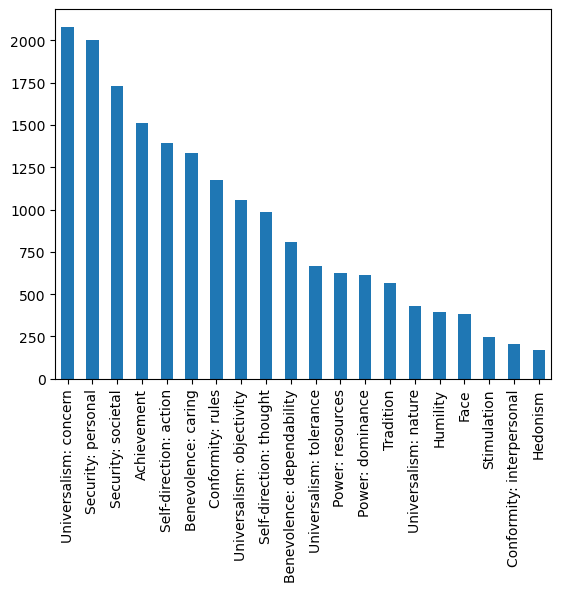

In [15]:
labels_columns= ["Self-direction: thought", "Self-direction: action", "Stimulation",
                 "Hedonism", "Achievement",
                 "Power: dominance",
                 "Power: resources", "Face",
                 "Security: personal", "Security: societal",
                 "Tradition",
                 "Conformity: rules",
                 "Conformity: interpersonal",
                 "Humility",
                 "Benevolence: caring",
                 "Benevolence: dependability","Universalism: concern", 
                 "Universalism: nature", "Universalism: tolerance", "Universalism: objectivity"]

training_data[labels_columns].sum().sort_values(ascending=False).plot(kind='bar')
print(len(labels_columns))

In [16]:
labels_columns

['Self-direction: thought',
 'Self-direction: action',
 'Stimulation',
 'Hedonism',
 'Achievement',
 'Power: dominance',
 'Power: resources',
 'Face',
 'Security: personal',
 'Security: societal',
 'Tradition',
 'Conformity: rules',
 'Conformity: interpersonal',
 'Humility',
 'Benevolence: caring',
 'Benevolence: dependability',
 'Universalism: concern',
 'Universalism: nature',
 'Universalism: tolerance',
 'Universalism: objectivity']

In [17]:
# sum just the labels with Self-transcendence
labels_columns_self_transcendence =  ['Benevolence: caring',
 'Benevolence: dependability', 'Universalism: concern', 
'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity']

training_data[labels_columns_self_transcendence].sum().sum()


6364

<AxesSubplot: >

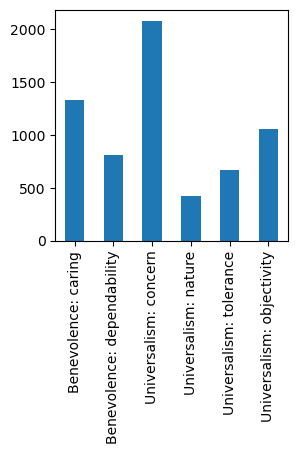

In [115]:
training_data[labels_columns_self_transcendence].sum().plot(kind='bar', figsize=(3,3));

In [18]:
# sum just the labels with openness to change
labels_columns_openness =  ['Self-direction: action',
 'Self-direction: thought', 'Stimulation']
training_data[labels_columns_openness].sum().sum()


2630

<AxesSubplot: >

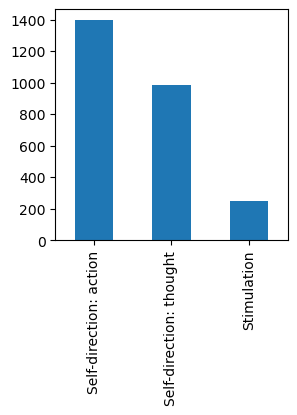

In [114]:
training_data[labels_columns_openness].sum().plot(kind='bar', figsize=(3,3));

In [19]:
# sum just the labels with self-enhancement
labels_columns_enhancement =  ['Achievement',
 'Power: resources', 'Power: dominance']
training_data[labels_columns_enhancement].sum().sum()


2747

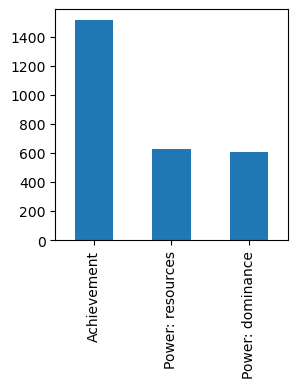

In [116]:
training_data[labels_columns_enhancement].sum().plot(kind='bar', figsize=(3,3));

In [20]:
# sum just the labels with conservation
labels_columns_conservation=  ['Security: personal',
 'Security: societal', 'Tradition', 'Conformity: interpersonal',
                 'Conformity: rules'  ]
training_data[labels_columns_conservation].sum().sum()


5680

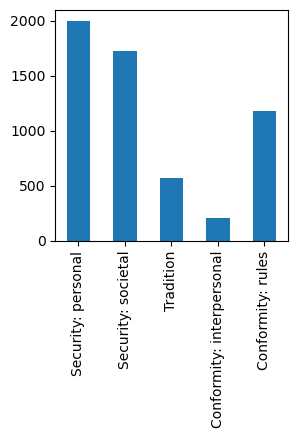

In [117]:
training_data[labels_columns_conservation].sum().plot(kind='bar', figsize=(3,3));

In [21]:
6364 + 2630 +2747 + 5680 +382 + 395 + 172

18370

In [22]:
training_data[labels_columns].sum().sort_values(ascending=False)
# Hedonism 172 -> Stimulation -> Stimulation = 247 + 172 = 419
# Hedonism 172 -> Achievement -> Achievement = 1512 + 172 = 1684

# Humility 395 -> caring -> caring = 1332 + 395 = 1727
# Humility 395 -> Interpersonal -> Interpersonal = 207 + 395 = 602

# Face 382 -> resources -> resources = 625 + 382 = 1007
# Face 382 -> Security: personal -> Security: personal = 2000 + 382 = 2382

#Idea: ribilanciare in maneira che la somma delle 4 aree sia bilanciata con undersampling.

Universalism: concern         2081
Security: personal            2000
Security: societal            1728
Achievement                   1512
Self-direction: action        1395
Benevolence: caring           1332
Conformity: rules             1177
Universalism: objectivity     1054
Self-direction: thought        988
Benevolence: dependability     806
Universalism: tolerance        664
Power: resources               625
Power: dominance               610
Tradition                      568
Universalism: nature           427
Humility                       395
Face                           382
Stimulation                    247
Conformity: interpersonal      207
Hedonism                       172
dtype: int64

In [23]:
training_data[labels_columns].sum().sum()

18370

In [24]:
 625 + 382

1007

In [25]:
training_data[labels_columns].sum().sort_values(ascending=False).index

Index(['Universalism: concern', 'Security: personal', 'Security: societal',
       'Achievement', 'Self-direction: action', 'Benevolence: caring',
       'Conformity: rules', 'Universalism: objectivity',
       'Self-direction: thought', 'Benevolence: dependability',
       'Universalism: tolerance', 'Power: resources', 'Power: dominance',
       'Tradition', 'Universalism: nature', 'Humility', 'Face', 'Stimulation',
       'Conformity: interpersonal', 'Hedonism'],
      dtype='object')

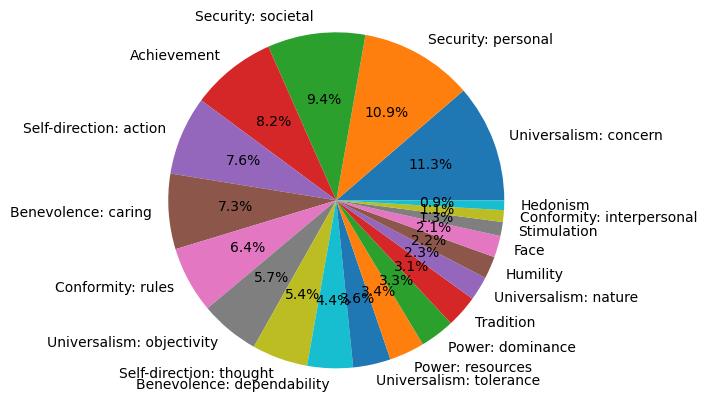

<Figure size 640x480 with 0 Axes>

In [26]:
fig1, ax1 = plt.subplots()
ax1.pie(training_data[labels_columns].sum().sort_values(ascending=False), 
        #labels=labels_columns, 
        labels= training_data[labels_columns].sum().sort_values(ascending=False).index,
        autopct='%1.1f%%', 
        #shadow=True,
         startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.tight_layout()


**DATA UNDERSTANDING**

In [28]:
def tokenize(text):
    tokenized = nltk.word_tokenize(text.lower())
    return tokenized

In [29]:
training_data["tokenized_premise"] = training_data["Premise"].apply(tokenize)
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,labels,tokenized_premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Security: societal],"[we, should, ban, human, cloning, as, it, will..."
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[Security: personal],"[fast, food, should, be, banned, because, it, ..."
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[Power: dominance, Security: societal]","[sometimes, economic, sanctions, are, the, onl..."
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,"[Security: societal, Conformity: rules, Univer...","[capital, punishment, is, sometimes, the, only..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,"[Security: personal, Benevolence: caring, Univ...","[factory, farming, allows, for, the, productio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,"[Achievement, Power: dominance, Security: soci...","[on, the, one, hand, ,, we, have, russia, kill..."
5388,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,"[Security: personal, Conformity: rules, Benevo...","[the, subsidies, were, originally, intended, t..."
5389,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"[Benevolence: dependability, Universalism: nat...","[these, products, come, mainly, from, large, e..."
5390,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,"[Security: personal, Security: societal, Confo...","[subsidies, often, make, farmers, in, recipien..."


In [30]:
len(training_data)

5392

In [31]:
# get tokens from nltk.word_tokenize(text.lower()), construct dictionary

In [99]:
from gensim import corpora
from collections import defaultdict

#texts = training_data.tokenized_premise.values


value_to_compare = "Power: resources"
only_onevalue = 'Face'
print(value_to_compare)
print("only_onevalue", only_onevalue)

df_for_text = training_data[training_data[value_to_compare]==1]
    

texts = df_for_text.tokenized_premise.values #training_data[training_data.Stimulation==1].tokenized_premise.values



frequency = defaultdict(int)
#remove words appearing only once
for text in texts:
    for token in text:
        frequency[token] += 1

removed = [
      [token for token in text if frequency[token] <= 1]
      for text in texts
]

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]
        
#remove common words
stoplist = set(', . : for a of the and to in to'.split())
texts = [
    [word for word in document if word not in stoplist]
    for document in texts
]
texts        

dictionary = corpora.Dictionary(texts)

print(dictionary)

Power: resources
only_onevalue Face
Dictionary<1100 unique tokens: ['cause', 'games', 'lot', 'money', 'olympic']...>


In [100]:
import gensim
import numpy as np
corpus = [dictionary.doc2bow(text) for text in texts]
numpy_matrix = gensim.matutils.corpus2dense(corpus,num_terms = len(dictionary))

In [101]:
df_corpus = pd.DataFrame(numpy_matrix, index = [k for k,v in dictionary.token2id.items()], 
                         columns =  df_for_text.Premise  ) #training_data.index)
df_corpus.T.head()

,cause,games,lot,money,olympic,advantage,algorithmic,an,banned,be,because,gives,it,people,should,some,trading,unfair,both,client,ensure,legalising,prostitution,safety,sex,trade,will,worker,are,at,end,from,good,jobs,mandatory,removes,retirement,that,they,we,who,as,compensation,executive,get,limit,not,organisation,salary,their,act,by,citizens,economic,harming,innocent,interest,less,nations,no,other,own,sanctions,used,your,;,exploration,important,is,low,more,much,on,priority,space,spend,subsidized,there,things,age,allows,better,families,generations,ladder,move,setting,support,up,younger,abolish,can,earn,fields,have,ideas,innovations,intellectual,living,need,property,protected,rights,scientists,so,days,freedom,legal,now,these,with,been,continue,has,order,orders,produced,rather,start,than,until,fair,if,lead,market,then,would,accordingly,compensated,executives,profits,provide,shareholders,austerity,debt,eliminate,go,national,needs,really,regime,where,field,over,rest,countries,culture,economies,many,our,part,place,tradition,whaling,achieve,benefit,enable,hard,what,worked,adopt,amount,bills,pay,same,collectivism,eliminates,etc,individual,worth,boost,country,economy,host,provides,able,cost,factory,farming,helps,income,lower,meat,produce,purchase,those,thus,hurt,nation,poorest,ended,older,college,each,expensive,getting,help,students,abolishing,law,save,strikes,three,between,employees,limited,line,workers,his,or,person,public,work,all,free,harm,preventing,turn,which,city,usually,ai,form,future,makes,most,opportunities,simply,costs,efficient,food,lowers,production,company,right,employers,fresh,talent,workforce,balance,collapse,deficits,financial,government,regimes,businesses,generation,innovation,keep,needed,new,aid,loans,student,subsidizing,ways,accurately,algorithm,ca,even,n't,quicker,greater,happen,involved,numbers,trades,accurate,effective,timely,reduces,allowed,prices,faster,human,value,due,funding,put,risk,safe,spaces,affordable,foreign,here,made,make,struggling,animals,ban,business,but,does,little,nothing,profit,rare,very,do,dollars,embryonic,going,i,stem,subsidize,tax,think,this,towards,always,back,down,holding,only,practices,progress,serve,slow,use,using,too,'s,activity,generated,whale,any,average,capital,ceo,generate,times,damage,wages,reduce,way,experience,position,study,through,care,common,health,reducing,schools,education,payers,when,healthcare,journalism,like,poor,short,control,situations,huge,libertarianism,?,come,research,waste,why,companies,error,finance,just,determine,beneficial,point,based,forced,someone,stop,working,actors,child,children,how,learn,necessary,above,long,out,scam,scientology,trying,bottom,military,private,capable,doing,force,job,therefore,benefits,labor,ones,you,profitable,certain,maintaining,might,restrict,sectors,increasing,likely,organs,share,supply,them,bonuses,could,enough,giving,members,offer,poorer,spent,staff,algorithms,day,making,operate,sleep,while,allow,anyone,ending,freely,conditions,equitable,illegal,legalizing,prostitutes,since,something,also,life,obtain,one,saves,self,success,corruption,punishment,society,funded,taxpayers,buy,computers,creating,difficult,massive,sell,becoming,growing,well,against,areas,costly,different,into,real,world,big,result,taxes,around,disaster,donald,great,last,leading,president,states,trump,united,us,were,years,causes,completely,fails,issues,often,such,pensions,putting,organ,receive,develop,grow,live,telemarketing,choice,else,give,personal,want,adopting,best,budget,currently,faced,its,responsible,wikipedia,journalists,paid,rewarded,contribute,supported,taking,thousands,top,-,about,crime,death,elites,feel,high,means,rates,themselves,activities,increase,local,expenses,given,planet,problems,worry,disparity,raises,alive,aware,news,small,kids,school,natural,never,past,overhead,crimes,deterrent,lives,prison,stay,worst,access,everyone,had,system,unless,elsewhere,gender,language,neutral,resources,leads,spending,unemployment,change,cosmetic,look,surgery,cheaper,fast,lack,rea

In [102]:
import numpy as np
from sklearn.metrics import pairwise_distances, pairwise
from scipy.spatial.distance import cosine, cdist


In [103]:
# test on new vec
#new_doc = "A survey on human computer interface system"
#new_vec = dictionary.doc2bow(new_doc.lower().split()) # make the bag of words
#numpy_vector = gensim.matutils.corpus2dense([new_vec],num_terms = len(dictionary))


In [104]:

def cos_csim(matrix, vector):
    """
    Compute the cosine similarity between each row of matrix and vector.
    """
    v = vector.reshape(1, -1)
    return 1 - cdist(matrix, v, 'cosine').reshape(-1)

#similarities = cos_csim(numpy_matrix.T,numpy_vector)
#similarities

In [105]:
#pd.set_option('display.max_colwidth', None)
#pd.DataFrame({"new document": [new_doc]*len(df_for_text.Premise),
#              "document": df_for_text.Premise,
#              "labels": df_for_text.labels,
#              "similarity": similarities}).sort_values(by=['similarity'], ascending=False)

In [106]:
# calculating average similarity between hedonism and 

print(only_onevalue)

df_only_onevalue = training_data[training_data[only_onevalue]==1]
df_only_onevalue.describe()

Face


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,0.204188,0.287958,0.096859,0.060209,0.350785,0.185864,0.115183,1.0,0.384817,0.235602,0.104712,0.230366,0.075916,0.070681,0.259162,0.123037,0.421466,0.039267,0.256545,0.185864
std,0.403636,0.453405,0.296153,0.238186,0.477842,0.389507,0.319662,0.0,0.487190,0.424931,0.306584,0.421620,0.265211,0.256627,0.438750,0.328910,0.494441,0.194484,0.437299,0.389507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
avg_similarity=[]
for i, row in df_only_onevalue.iterrows():
    new_doc = row.tokenized_premise
    print(new_doc)
    new_vec = dictionary.doc2bow(new_doc) # make the bag of words
    numpy_vector = gensim.matutils.corpus2dense([new_vec],num_terms = len(dictionary))
    avg_similarity.append(cos_csim(numpy_matrix.T,numpy_vector))


print(only_onevalue, "compared with", value_to_compare)

print("mean of similarities", np.array(avg_similarity).mean())


['three', 'strike', 'laws', 'can', 'cause', 'young', 'people', 'to', 'be', 'put', 'away', 'for', 'life', 'without', 'a', 'chance', 'to', 'straight', 'out', 'their', 'life']
['there', 'are', 'parades', 'for', 'every', 'group', 'and', 'it', 'is', 'discrimination', 'not', 'to', 'give', 'gays', 'their', 'parade']
['executives', 'deserve', 'the', 'money', 'as', 'they', 'do', 'a', 'stressful', 'and', 'demanding', 'job', 'leading', 'large', 'organizations', 'that', 'hire', 'large', 'number', 'of', 'people', '.']
['we', 'should', 'adopt', 'gender-neutral', 'language', 'because', 'it', 'avoids', 'offending', 'people', 'with', 'gender', 'stereo-types']
['pride', 'parades', 'encourage', 'people', 'to', 'claim', 'the', 'rights', 'and', 'freedoms', 'they', 'are', 'entitled', 'to']
['nuclear', 'weapons', 'can', 'bring', 'about', 'a', 'certain', 'level', 'of', 'respect']
['economic', 'sanctions', 'are', 'unethical', 'to', 'the', 'economies', 'of', 'smaller', ',', 'underdeveloped', 'countries', '.']
[

['we', 'can', 'not', 'ban', 'any', 'church', ',', 'people', 'must', 'be', 'free', 'to', 'believe', 'in', 'whatever', 'religion', 'they', 'choose', '.', 'this', 'is', 'a', 'fundamental', 'right', '.']
['cannabis', 'can', 'lead', 'to', 'experimentation', 'with', 'more', 'dangerous', 'drugs', '.', 'legalizing', 'it', 'would', 'make', 'it', 'easier', 'for', 'youth', 'to', 'acquire', '.']
['we', 'should', 'adopt', 'gender-neutral', 'language', 'because', 'it', 'will', 'make', 'communication', 'easier', 'between', 'genders']
['it', 'is', 'the', 'go', 'to', 'encyclopedia', 'and', 'should', 'be', 'of', 'the', 'highest', 'quality', 'possible']
['school', 'uniforms', 'can', 'prevent', 'bullying', 'due', 'to', 'economic', 'background', 'and', 'appearance', '.']
['pride', 'parades', 'send', 'the', 'wrong', 'message', 'to', 'young', 'children', '.']
['we', 'should', 'cancel', 'pride', 'parades', 'because', 'they', 'entice', 'people', 'who', 'oppose', 'that', 'ideology', 'to', 'cause', 'riots', 'and

['abolishing', 'the', 'veto', 'right', 'in', 'the', 'current', 'eu', 'foreign', 'policy', 'voting', 'procedure', 'will', 'only', 'serve', 'larger', 'nations', 'in', 'the', 'union', 'and', 'small', 'member', 'states', 'would', 'lose', 'all', 'their', 'power', 'and', 'slowly', 'turn', 'into', 'puppets', 'of', 'the', 'larger', 'nations', 'instead', 'of', 'equal', 'partners']
['russia', 'in', 'the', 'eu', '?', 'no', ',', 'thanks', '!']
['europe', '’', 's', 'sovereignty', 'and', 'credibility', 'are', 'at', 'this', 'price', '.', 'the', 'burden', 'of', 'european', 'defense', 'can', 'not', 'rest', 'on', 'the', 'back', 'of', 'a', 'small', 'number', 'of', 'countries', 'and', 'potential', 'conflicts', 'are', 'increasing', '.']
['the', 'eu', 'must', 'ensure', 'that', 'all', 'products', 'entering', 'the', 'eu', 'are', 'grown', ',', 'manufactured', ',', 'and', 'grown', 'to', 'certain', 'standards', '.', 'this', 'should', 'ensure', 'that', 'people', 'in', 'the', 'south', 'have', 'a', 'dignified', 'li

### Hedonism assignement
Hedonism compared with Stimulation
mean of similarities 0.08879130057458832

Hedonism compared with Achievement
mean of similarities 0.06971842651551531



### Humility assignement

Humility compared with Benevolence: caring
mean of similarities 0.07230208442095615

Humility compared with Conformity: interpersonal
mean of similarities 0.09622581729777978

### Face assignement
Face compared with Security: personal
mean of similarities 0.06180313655067462

Face compared with Power: resources
mean of similarities 0.06886023644580737

##  reassignement

<AxesSubplot: >

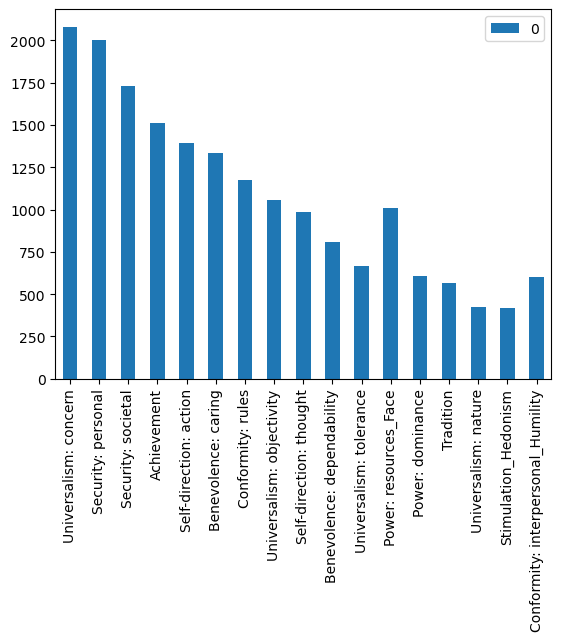

In [128]:
raw_assign = {"Universalism: concern"   :      2081,
"Security: personal"      :      2000,
"Security: societal"      :      1728,
"Achievement"             :      1512,
"Self-direction: action"  :      1395,
"Benevolence: caring"      :     1332,
"Conformity: rules"         :    1177,
"Universalism: objectivity"  :   1054,
"Self-direction: thought"    :    988,
"Benevolence: dependability"  :   806,
"Universalism: tolerance"    :    664,
"Power: resources"          :     625,
"Power: dominance"          :     610,
"Tradition"                 :     568,
"Universalism: nature"      :     427,
"Humility"                  :     395,
"Face"                      :     382,
"Stimulation"               :     247,
"Conformity: interpersonal" :     207,
"Hedonism"                  :     172}

new_assign =  {"Universalism: concern"   :      2081,
"Security: personal"      :      2000,
"Security: societal"      :      1728,
"Achievement"             :      1512,
"Self-direction: action"  :      1395,
"Benevolence: caring"      :     1332,
"Conformity: rules"         :    1177,
"Universalism: objectivity"  :   1054,
"Self-direction: thought"    :    988,
"Benevolence: dependability"  :   806,
"Universalism: tolerance"    :    664,
"Power: resources_Face"          :     625 + 382,
"Power: dominance"          :     610,
"Tradition"                 :     568,
"Universalism: nature"      :     427,
#"Humility"                  :     395,
#"Face"                      :     382,
"Stimulation_Hedonism"               :     247+172,
"Conformity: interpersonal_Humility" :     207 + 395,
#"Hedonism"                  :     172
}
pd.DataFrame.from_dict(new_assign, orient='index').plot(kind='bar')